In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import glob
import os

# Data Preparation 

Concatenation the data files into 1 dataframe 

In [46]:
path = '/content/drive/MyDrive/Omdena-Water-Quality/'
arr = os.listdir('/content/drive/MyDrive/Omdena-Water-Quality/')
filepath = [path+x for x in arr ]
#filepath
dfs = [pd.read_csv(x) for x in filepath]
df = pd.concat(map(pd.read_csv, filepath))
df.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Temperature.1,Chlorophyll
0,6.493227,0.103805,27.157200,7.500011,-0.086624,0.586978,0.601205,27.157200,0.075032
1,6.248253,0.133282,26.323203,7.443083,-0.142276,0.585847,0.601423,26.323203,0.084885
2,6.672325,0.134190,26.012164,7.505689,-0.131940,0.581780,0.592781,26.012164,0.084325
3,6.506585,0.145769,25.858353,7.508946,-0.136383,0.601673,0.621366,25.858353,0.091274
4,6.413502,0.147652,27.005098,7.565794,-0.146982,0.585171,0.602319,27.005098,0.094696


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Data/Test_Data_2021_Jan_August_Kankaria_Lake.csv')

In [47]:
#checking for nan in each dataframe to see if there is similarity in nans with respect to year
nan = [(len(df) - df.count())/len(df) for df in dfs]
nan

[Dissolved Oxygen            0.666667
 Salinity                    0.666667
 Temperature                 0.666667
 pH                          0.666667
 Turbidity                   0.666667
 Dissolved Organic Matter    0.000000
 Suspended Matter            0.000000
 Temperature.1               0.666667
 Chlorophyll                 0.666667
 dtype: float64, Dissolved Oxygen            0.666667
 Salinity                    0.666667
 Temperature                 0.666667
 pH                          0.666667
 Turbidity                   0.666667
 Dissolved Organic Matter    0.000000
 Suspended Matter            0.000000
 Temperature.1               0.666667
 Chlorophyll                 0.666667
 dtype: float64, Dissolved Oxygen            0.0
 Salinity                    0.0
 Temperature                 0.0
 pH                          0.0
 Turbidity                   0.0
 Dissolved Organic Matter    0.0
 Suspended Matter            0.0
 Temperature.1               0.0
 Chlorophyll        

In [48]:
df.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Temperature.1,Chlorophyll
0,6.493227,0.103805,27.157200,7.500011,-0.086624,0.586978,0.601205,27.157200,0.075032
1,6.248253,0.133282,26.323203,7.443083,-0.142276,0.585847,0.601423,26.323203,0.084885
2,6.672325,0.134190,26.012164,7.505689,-0.131940,0.581780,0.592781,26.012164,0.084325
3,6.506585,0.145769,25.858353,7.508946,-0.136383,0.601673,0.621366,25.858353,0.091274
4,6.413502,0.147652,27.005098,7.565794,-0.146982,0.585171,0.602319,27.005098,0.094696


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4292 entries, 0 to 1061
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dissolved Oxygen          1500 non-null   float64
 1   Salinity                  1500 non-null   float64
 2   Temperature               1500 non-null   float64
 3   pH                        1500 non-null   float64
 4   Turbidity                 1500 non-null   float64
 5   Dissolved Organic Matter  4292 non-null   float64
 6   Suspended Matter          4292 non-null   float64
 7   Temperature.1             1146 non-null   float64
 8   Chlorophyll               1500 non-null   float64
dtypes: float64(9)
memory usage: 335.3 KB


In [50]:
df.describe()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Temperature.1,Chlorophyll
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,4292.000000,4292.000000,1146.000000,1500.000000
mean,7.944512,0.111559,27.202914,7.303414,-0.156364,0.458285,0.515713,27.720113,0.026547
std,1.830632,0.031773,3.542746,0.343070,0.106536,0.090906,0.068113,3.896483,0.041666
min,-7.101958,0.000177,23.052158,6.743936,-0.303689,0.290931,0.370891,23.052158,-0.054591
25%,7.753600,0.095808,24.574459,7.093384,-0.213802,0.386562,0.461194,24.170278,-0.000815
50%,8.220975,0.113270,25.857498,7.172302,-0.191654,0.445587,0.515095,27.162327,0.015024
75%,8.702500,0.128822,28.723935,7.395895,-0.155212,0.526775,0.564023,29.611339,0.044538
max,19.296250,0.247035,39.183504,8.203932,0.141330,0.758897,0.710732,39.183504,0.250091


In [51]:
count_nan = len(df) - df.count()
print('% of missing values \n',count_nan/len(df))
print('No. of missing values \n',count_nan)
print('Length of the dataframe \n',len(df))
print('Total workable values \n',df.count())

% of missing values 
 Dissolved Oxygen            0.650513
Salinity                    0.650513
Temperature                 0.650513
pH                          0.650513
Turbidity                   0.650513
Dissolved Organic Matter    0.000000
Suspended Matter            0.000000
Temperature.1               0.732992
Chlorophyll                 0.650513
dtype: float64
No. of missing values 
 Dissolved Oxygen            2792
Salinity                    2792
Temperature                 2792
pH                          2792
Turbidity                   2792
Dissolved Organic Matter       0
Suspended Matter               0
Temperature.1               3146
Chlorophyll                 2792
dtype: int64
Length of the dataframe 
 4292
Total workable values 
 Dissolved Oxygen            1500
Salinity                    1500
Temperature                 1500
pH                          1500
Turbidity                   1500
Dissolved Organic Matter    4292
Suspended Matter            4292
Temperatur

In [52]:
#parameter unit correction for applying thresholds 
df['Dissolved Organic Matter'] = df['Dissolved Organic Matter']*1000
df['Suspended Matter'] = df['Suspended Matter']*1000
df.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Temperature.1,Chlorophyll
0,6.493227,0.103805,27.157200,7.500011,-0.086624,586.978271,601.204692,27.157200,0.075032
1,6.248253,0.133282,26.323203,7.443083,-0.142276,585.847292,601.423311,26.323203,0.084885
2,6.672325,0.134190,26.012164,7.505689,-0.131940,581.780371,592.781317,26.012164,0.084325
3,6.506585,0.145769,25.858353,7.508946,-0.136383,601.673448,621.365864,25.858353,0.091274
4,6.413502,0.147652,27.005098,7.565794,-0.146982,585.170794,602.319324,27.005098,0.094696


In [53]:
df.dropna(axis=1)
df = df.drop(['Temperature.1'],axis=1)
df.count()

Dissolved Oxygen            1500
Salinity                    1500
Temperature                 1500
pH                          1500
Turbidity                   1500
Dissolved Organic Matter    4292
Suspended Matter            4292
Chlorophyll                 1500
dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


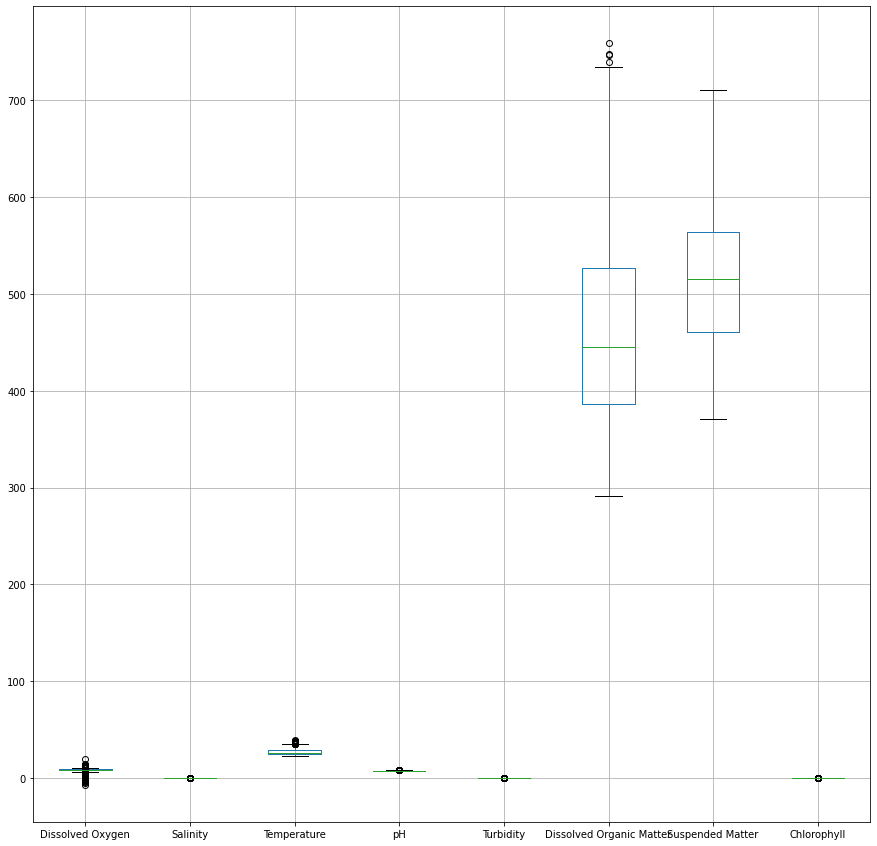

In [54]:
df.boxplot(figsize=(15,15))

Highest number of data points out of the inter-quartile range are seen in dissolved oxygen

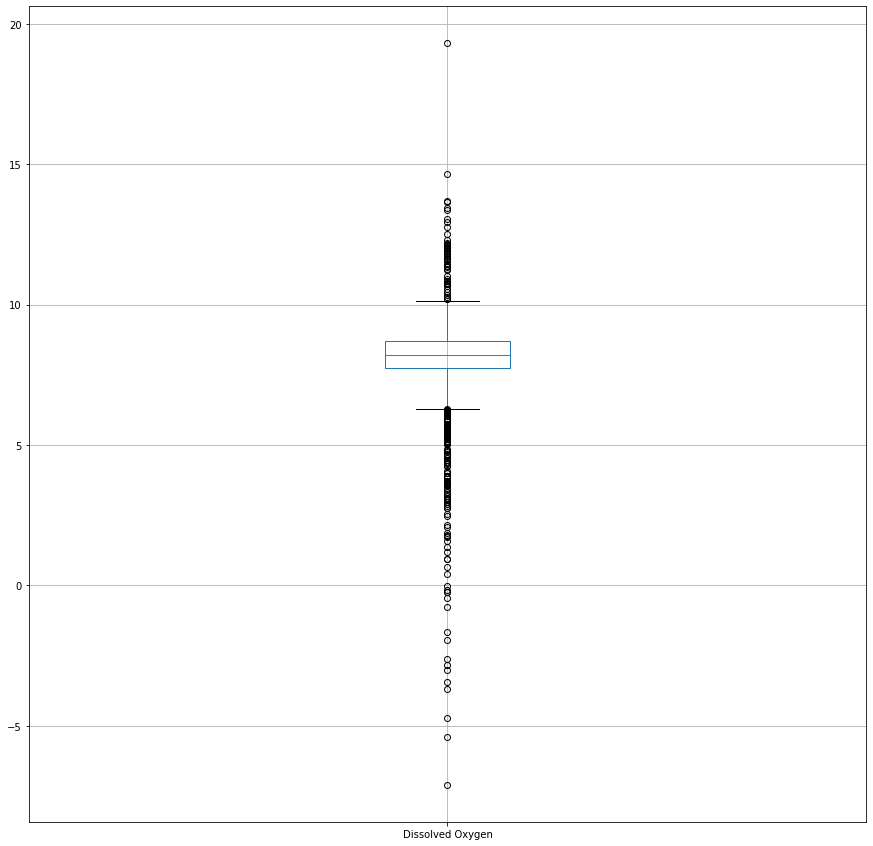

In [21]:
df.boxplot(column=['Dissolved Oxygen'],figsize=(15,15))

In [55]:
#df = df.drop(['Temperature.1'],axis=1)
good = df.copy()
poor = df.copy()
need_treatment = df.copy()



In [56]:
good = good[(good['Chlorophyll']>=-0.1)& (good['Chlorophyll']<=0.1)&(good['Dissolved Organic Matter']<500)& 
            (good['Dissolved Oxygen']>6.5)& 
            (good['pH']>=6.5)&(good['pH']<=8.5)& 
            (good['Suspended Matter']>=300)& 
            (good['Suspended Matter']<=600)  & 
            (good['Turbidity']>=-0.2)&
            (good['Turbidity']<=0)&
            (good['Temperature']>=15)&
            (good['Temperature']<=35)]
good.count()

Dissolved Oxygen            461
Salinity                    461
Temperature                 461
pH                          461
Turbidity                   461
Dissolved Organic Matter    461
Suspended Matter            461
Chlorophyll                 461
dtype: int64

Good

1.   Chlorophyll
2.   Dissolved Organic Matter
3.   Dissolved Oxygen
4.   ph
5.   Suspended Matter 
6.   Turbidity 
7.   Temperature


Not Working 

1. Salinity as there is only needs treatment data out of all 3 salinity categories 





In [57]:
good.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll
2,8.607483,0.140199,32.333792,7.332831,-0.134986,482.654214,549.775467,0.060282
3,8.672250,0.141625,31.886031,7.287873,-0.158115,489.803376,552.842017,0.068695
4,8.349350,0.085519,32.412406,7.309844,-0.169355,492.299274,536.438907,0.072072
14,8.154483,0.026860,28.392815,7.212134,-0.156744,489.007999,548.253018,0.058345
15,8.132050,0.080670,28.519281,7.215738,-0.158215,490.330077,548.673713,0.043999


In [58]:
good['Salinity']>1

2      False
3      False
4      False
14     False
15     False
       ...  
345    False
347    False
348    False
349    False
352    False
Name: Salinity, Length: 461, dtype: bool

In [59]:
good['Class'] = 'good'
good.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll,Class
2,8.607483,0.140199,32.333792,7.332831,-0.134986,482.654214,549.775467,0.060282,good
3,8.672250,0.141625,31.886031,7.287873,-0.158115,489.803376,552.842017,0.068695,good
4,8.349350,0.085519,32.412406,7.309844,-0.169355,492.299274,536.438907,0.072072,good
14,8.154483,0.026860,28.392815,7.212134,-0.156744,489.007999,548.253018,0.058345,good
15,8.132050,0.080670,28.519281,7.215738,-0.158215,490.330077,548.673713,0.043999,good


In [60]:
poor = df.copy()

In [61]:
poor = poor[(poor['Chlorophyll']>0.5)|(poor['Dissolved Organic Matter']>2000)|
            (poor['Dissolved Oxygen']<4)|
            ((poor['pH']>11)&(poor['pH']<14))| 
            ((poor['pH']>1)&(poor['pH']<4))|
            ((poor['Suspended Matter']>900)&
            (poor['Suspended Matter']<1200))|
            (poor['Turbidity']>0.2)|(poor['Temperature']>40)|
            (poor['Temperature']<5)]
poor.count()

Dissolved Oxygen            50
Salinity                    50
Temperature                 50
pH                          50
Turbidity                   50
Dissolved Organic Matter    50
Suspended Matter            50
Chlorophyll                 50
dtype: int64

In [63]:
poor['Class'] = 'poor'

In [64]:
poor.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll,Class
5,2.744673,0.213237,28.049304,7.963082,-0.047388,628.281724,637.801433,0.175436,poor
18,-3.020070,0.247035,28.855956,8.192037,-0.031610,639.365478,660.408563,0.250091,poor
20,-0.245892,0.195969,28.027086,8.146460,-0.006623,622.311972,641.305836,0.206551,poor
21,3.592500,0.190533,26.487268,7.886850,-0.070272,603.887110,619.226061,0.173381,poor
22,3.266275,0.154158,25.603710,7.853119,-0.075402,614.444210,627.586875,0.154988,poor


In [65]:
df_gp = pd.concat([poor,good],ignore_index=True)

In [66]:
df_gp.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll,Class
0,2.744673,0.213237,28.049304,7.963082,-0.047388,628.281724,637.801433,0.175436,poor
1,-3.020070,0.247035,28.855956,8.192037,-0.031610,639.365478,660.408563,0.250091,poor
2,-0.245892,0.195969,28.027086,8.146460,-0.006623,622.311972,641.305836,0.206551,poor
3,3.592500,0.190533,26.487268,7.886850,-0.070272,603.887110,619.226061,0.173381,poor
4,3.266275,0.154158,25.603710,7.853119,-0.075402,614.444210,627.586875,0.154988,poor


In [67]:
df_gp.tail()
df.count()

Dissolved Oxygen            1500
Salinity                    1500
Temperature                 1500
pH                          1500
Turbidity                   1500
Dissolved Organic Matter    4292
Suspended Matter            4292
Chlorophyll                 1500
dtype: int64

In [68]:
df_all = df_gp.merge(df.drop_duplicates(), on=['Dissolved Oxygen','Salinity','Temperature','pH','Turbidity','Dissolved Organic Matter','Suspended Matter','Chlorophyll'], 
                   how='right', indicator=True)
df_all.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll,Class,_merge
0,6.493227,0.103805,27.157200,7.500011,-0.086624,586.978271,601.204692,0.075032,NaN,right_only
1,6.248253,0.133282,26.323203,7.443083,-0.142276,585.847292,601.423311,0.084885,NaN,right_only
2,6.672325,0.134190,26.012164,7.505689,-0.131940,581.780371,592.781317,0.084325,NaN,right_only
3,6.506585,0.145769,25.858353,7.508946,-0.136383,601.673448,621.365864,0.091274,NaN,right_only
4,6.413502,0.147652,27.005098,7.565794,-0.146982,585.170794,602.319324,0.094696,NaN,right_only


In [69]:
len(df_all)

3380

In [70]:
df_all['Class'].fillna('Needs Treatment', inplace=True)
df_all.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll,Class,_merge
0,6.493227,0.103805,27.157200,7.500011,-0.086624,586.978271,601.204692,0.075032,Needs Treatment,right_only
1,6.248253,0.133282,26.323203,7.443083,-0.142276,585.847292,601.423311,0.084885,Needs Treatment,right_only
2,6.672325,0.134190,26.012164,7.505689,-0.131940,581.780371,592.781317,0.084325,Needs Treatment,right_only
3,6.506585,0.145769,25.858353,7.508946,-0.136383,601.673448,621.365864,0.091274,Needs Treatment,right_only
4,6.413502,0.147652,27.005098,7.565794,-0.146982,585.170794,602.319324,0.094696,Needs Treatment,right_only


In [71]:
df_all = df_all.dropna()

In [72]:
df_all = df_all.drop_duplicates()
len(df_all)

1500

In [73]:
df_all = df_all.drop(columns=['_merge'])

In [74]:
df_all.head()

,Dissolved Oxygen,Salinity,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll,Class
0,6.493227,0.103805,27.157200,7.500011,-0.086624,586.978271,601.204692,0.075032,Needs Treatment
1,6.248253,0.133282,26.323203,7.443083,-0.142276,585.847292,601.423311,0.084885,Needs Treatment
2,6.672325,0.134190,26.012164,7.505689,-0.131940,581.780371,592.781317,0.084325,Needs Treatment
3,6.506585,0.145769,25.858353,7.508946,-0.136383,601.673448,621.365864,0.091274,Needs Treatment
4,6.413502,0.147652,27.005098,7.565794,-0.146982,585.170794,602.319324,0.094696,Needs Treatment


In [ ]:
df_all.to_csv('/content/drive/MyDrive/Omdena-Water-Quality/Labelled_Water_Quality_Test_Data')

In [23]:
#Preparing a function for labelling in case of addition of more data

def label(df_path):

  '''
  This function helps in labelling the dataframe to generater training and testing data. 
  df_path : is the path of the dataframe having the parameters and their scores

  Then thresholds based on the research are applied on each parameter to give them 'good','poor','Needs Treatment' label.
  '''

  df = pd.read_csv(df_path)
  #df['Dissolved Organic Matter'] = df['Dissolved Organic Matter']*1000
  #df['Suspended Matter'] = df['Suspended Matter']*1000
  good = df.copy()
  poor = df.copy()

  # good labels
  good = good[(good['Chlorophyll']>=-0.1)& (good['Chlorophyll']<=0.1)&(good['Dissolved Organic Matter']<500)& 
            (good['Dissolved Oxygen']>6.5)& 
            (good['pH']>=6.5)&(good['pH']<=8.5)& 
            (good['Suspended Matter']>=300)& 
            (good['Suspended Matter']<=600)  & 
            (good['Turbidity']>=-0.2)&
            (good['Turbidity']<=0)&
            (good['Temperature']>=15)&
            (good['Temperature']<=35)]
  
  good['Class'] = 'good'

  # poor labels 
  poor = poor[(poor['Chlorophyll']>0.5)|(poor['Dissolved Organic Matter']>2000)|
              (poor['Dissolved Oxygen']<4)|
              ((poor['pH']>11)&(poor['pH']<14))| 
              ((poor['pH']>1)&(poor['pH']<4))|
              ((poor['Suspended Matter']>900)&
              (poor['Suspended Matter']<1200))|
              (poor['Turbidity']>0.2)|(poor['Temperature']>40)|
              (poor['Temperature']<5)]

  poor['Class'] = 'poor'

  df_gp = pd.concat([poor,good],ignore_index=True)

  df_all = df_gp.merge(df.drop_duplicates(), on=['Dissolved Oxygen','Salinity','Temperature','pH','Turbidity','Dissolved Organic Matter','Suspended Matter','Chlorophyll'], 
                   how='right', indicator=True)
  
  df_all['Class'].fillna('Needs Treatment', inplace=True)
  df_all = df_all.dropna()
  df_all = df_all.drop_duplicates()
  df_all = df_all.drop(columns=['_merge'])
  return df_all


In [24]:
df = label('/content/drive/MyDrive/Omdena-Water-Quality/Data_Shinai_Lake_2019')

#Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df_all[['Dissolved Oxygen','Temperature','pH','Turbidity','Dissolved Organic Matter','Suspended Matter','Chlorophyll']])
df_scaled_x = pd.DataFrame(scaled,columns=['Dissolved Oxygen','Temperature','pH','Turbidity','Dissolved Organic Matter','Suspended Matter','Chlorophyll'])

In [ ]:
df_scaled_x.head()

,Dissolved Oxygen,Temperature,pH,Turbidity,Dissolved Organic Matter,Suspended Matter,Chlorophyll
0,0.515004,0.254476,0.517861,0.487765,0.582659,0.638739,0.425435
1,0.505724,0.202776,0.478869,0.362710,0.579913,0.639460,0.457774
2,0.521789,0.183494,0.521750,0.385936,0.570040,0.610956,0.455935
3,0.515510,0.173959,0.523981,0.375952,0.618332,0.705238,0.478746
4,0.511984,0.245047,0.562918,0.352135,0.578271,0.642416,0.489975


In [ ]:
y = df_all['Class']


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y = le.fit_transform(y)
Y[:5]

array([0, 0, 0, 0, 0])

# Final Class Prediction

In [ ]:
import pandas as pd


def salinity(salinity_score):

  '''
  conditions for salinity are based on research
  '''

  if salinity_score >= 1:
    return 'good'
  elif salinity_score < 0:
    return 'poor'
  else :
    return 'Needs Treatment'

#salinity_class = salinity(salinity_score)

def final_class(predicited_class,salinity_class):

  '''
  This function determines the final class predicted by our application 
  For this we check the salinity class and class predicted by out model based on 7 parameters

  Final class is 'good', if both salinity_class and predicted_class is good
  Final class is 'poor', if either salinity_class or predicted_class or both are poor
  Final class is 'Needs Treatment', if both are 'Needs Treatment' or either of them is 'Needs Treatment' with other being good.
  '''

  if salinity_class == 'good':
    if predicited_class == 'good':
      return 'good'
    else :
      return predicited_class
  elif salinity_class == 'Needs Treatment':
    if predicited_class == 'poor':
      return 'poor'
    else :
      return 'Needs Treatment'
  else :
    return 'poor'